<a href="https://colab.research.google.com/github/anjithababuraj/CognoRise-Infotech/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1 - BREAST CANCER CLASSIFICATION**

Create machine learning model for the diagnosis of breast tissues (M = malignant, B = benign) from 31 features

IMPORT REQUIRED LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING DATA

In [ ]:
data=pd.read_csv('/content/data[1].csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


DATA INFORMATIONS

In [ ]:
# number of rows and columns in the data
data.shape

(569, 33)

In [ ]:
# first five rows in the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# last five rows in the data
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
# to collect columns included in the data
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# data type corresponds to each column
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# statistical measurements of the numerical columns
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


DATA PREPROCESSING

In [ ]:
# to detect missing value columns
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# drop unwanted columns 'id' and 'Unnamed: 32'
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# unique values in the target 'diagnosis'
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
# encoded 'M'(malignant) into 1 and 'B'(benign) into 0 using map function
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [ ]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

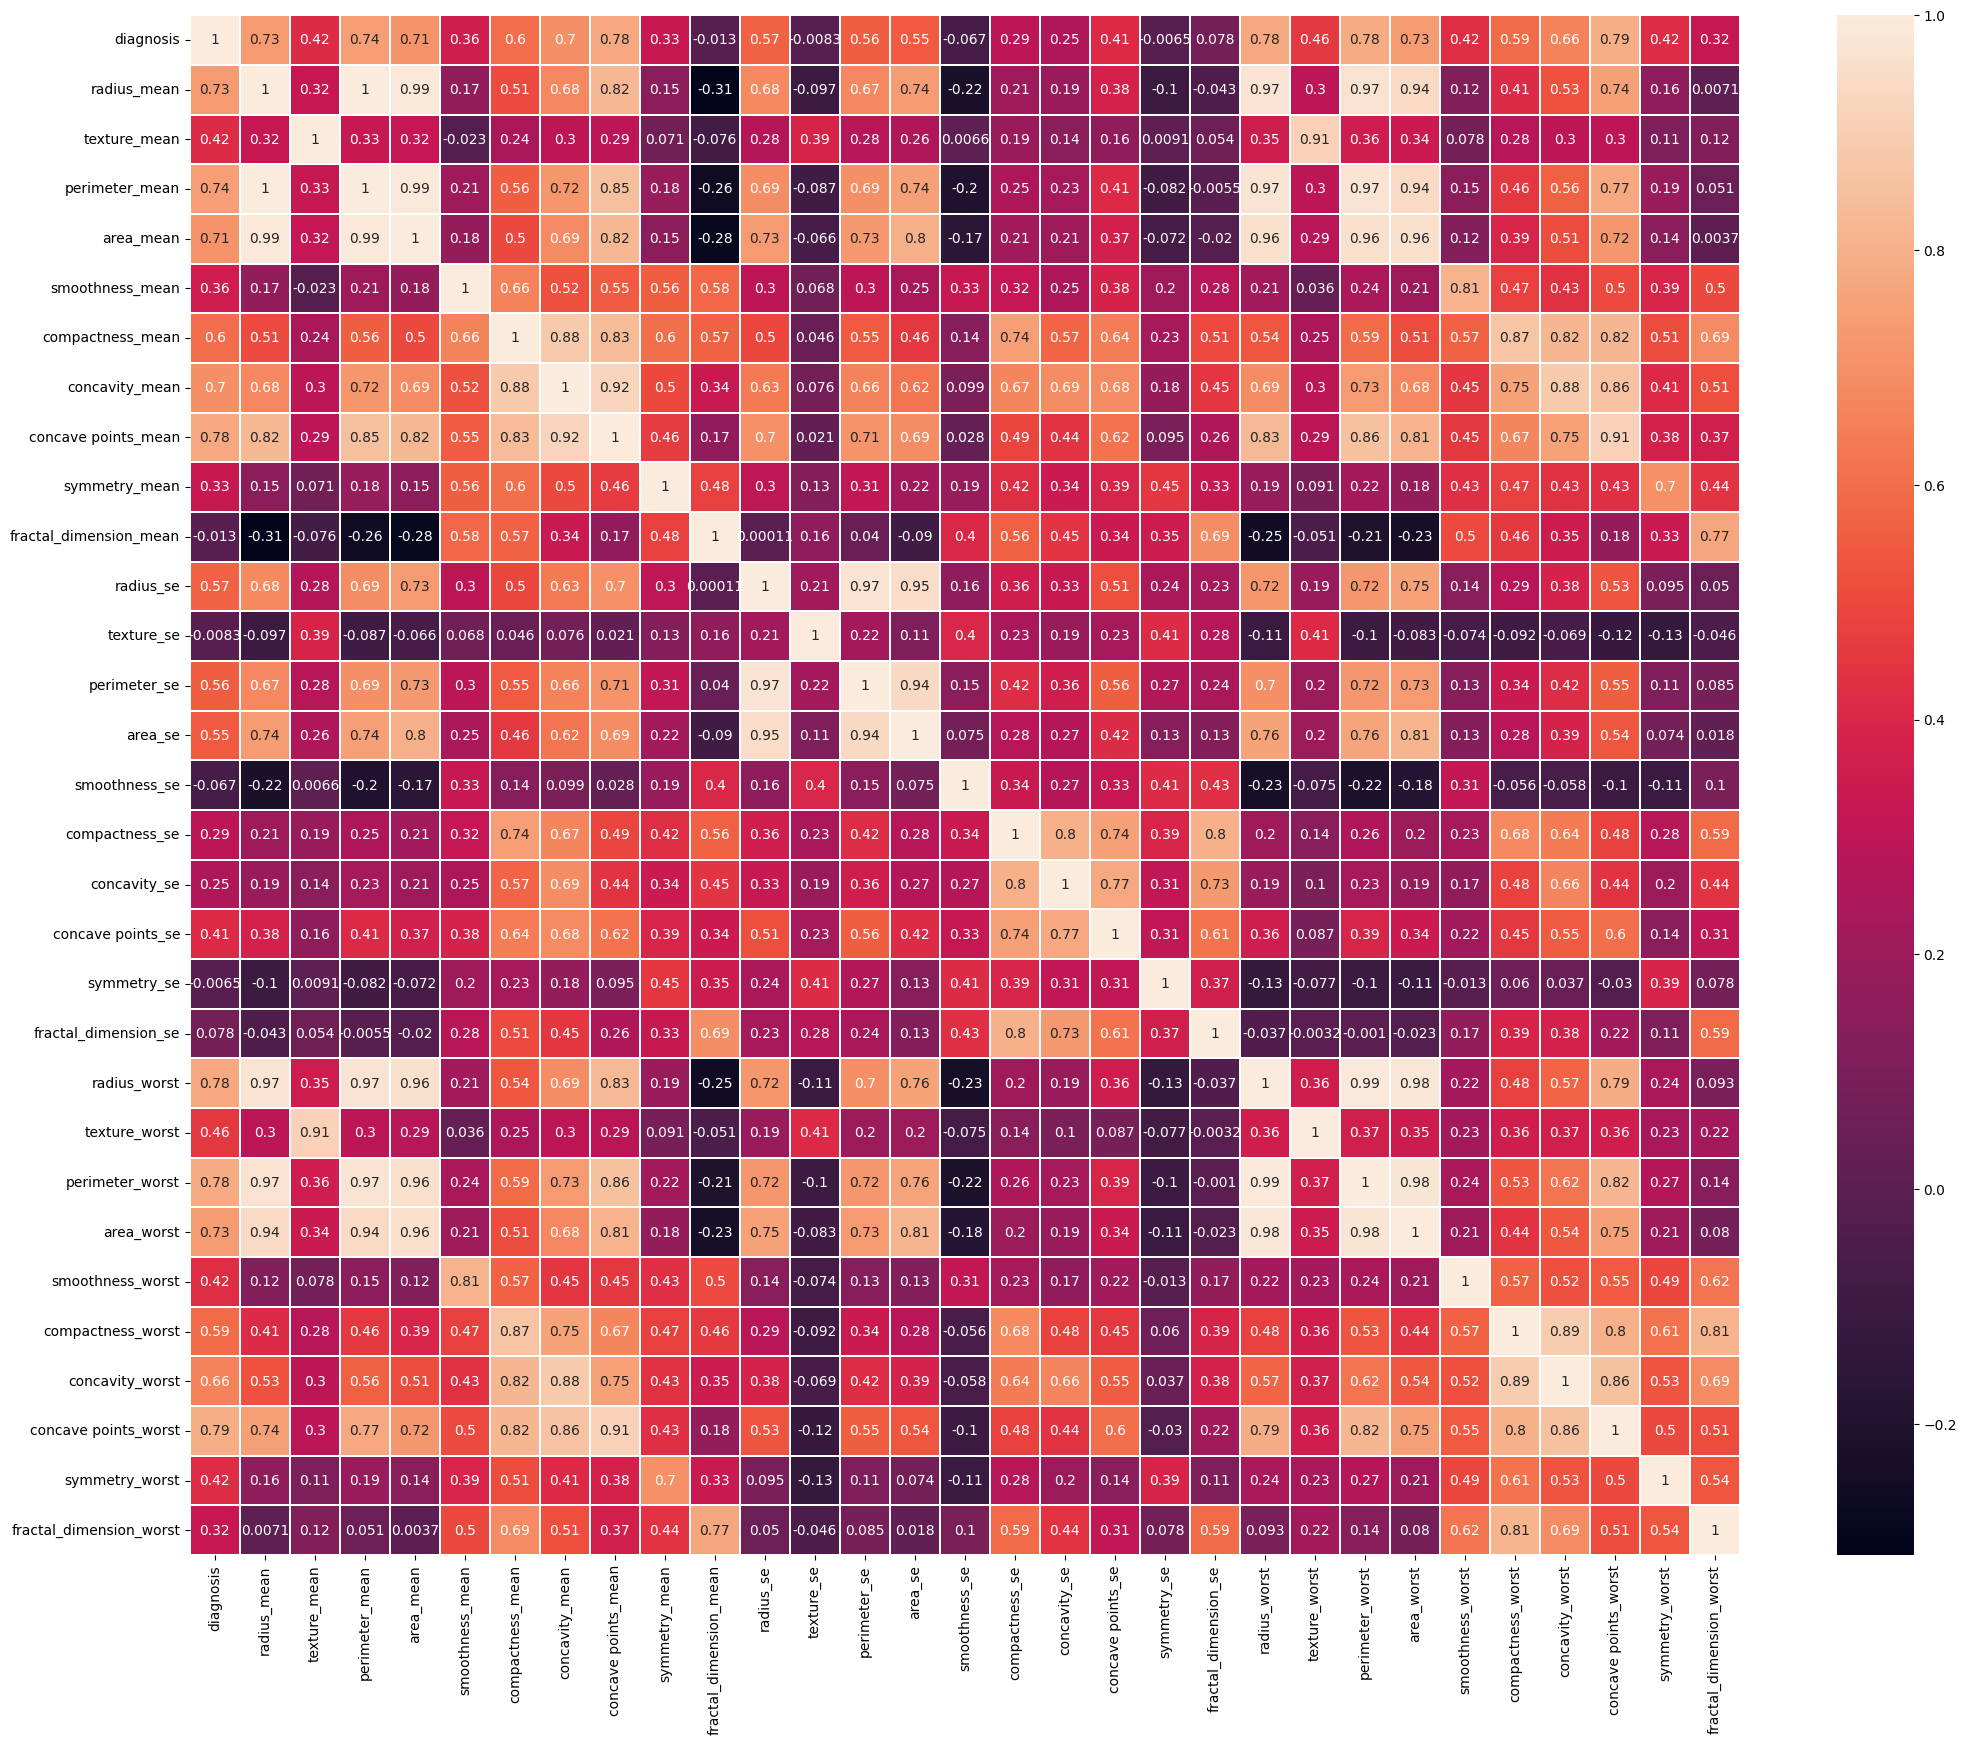

In [ ]:
# correlation between numeric columns with 'weather'
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(data.corr(),linewidth=0.10,annot=True)

In [ ]:
# drop columns which are less correlated with 'diagnosis'
data.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis=1,inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# From a pair of highly correlated columns, drop one column.
# Both will affect the 'diagnosis' at the same rate, so even if one falls, it will not be reflected in the output.
data.drop(['texture_worst','concave points_mean','perimeter_se','radius_se','perimeter_worst','radius_worst'],axis=1,inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,area_se,compactness_se,concavity_se,concave points_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,153.40,0.04904,0.05373,0.01587,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,74.08,0.01308,0.01860,0.01340,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,94.03,0.04006,0.03832,0.02058,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,27.23,0.07458,0.05661,0.01867,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,94.44,0.02461,0.05688,0.01885,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'area_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# shape after drop all unwanted columns
data.shape

(569, 20)

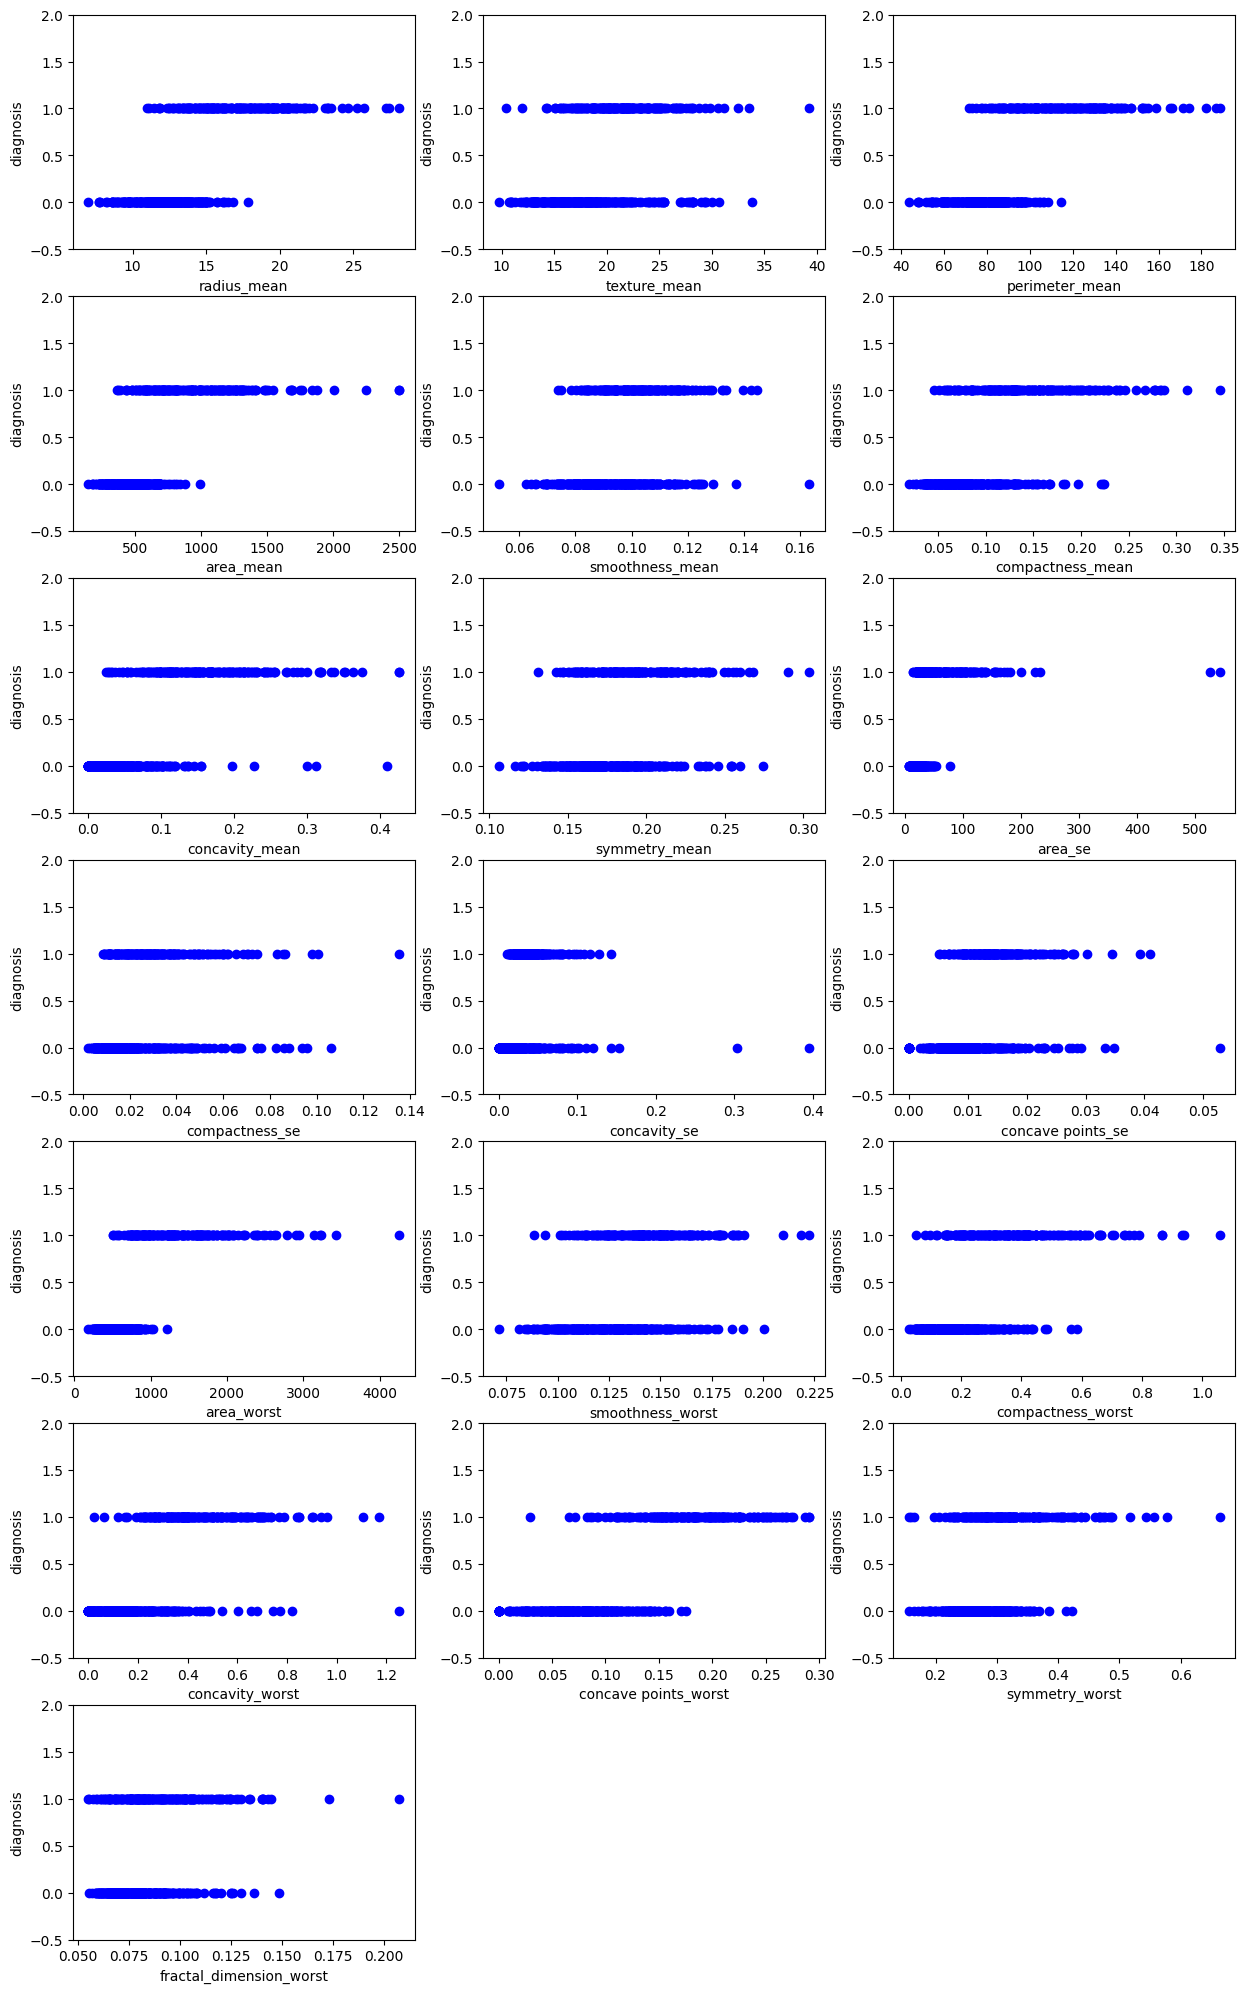

In [ ]:
fig = plt.figure(figsize=(15,25))
features=['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'area_se', 'compactness_se', 'concavity_se','concave points_se', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']
j=0
for i in range(1,20):
  plt.subplot(7,3,i)
  plt.scatter(x=features[j],y='diagnosis',data=data,color='b')
  plt.xlabel(features[j])
  plt.ylabel("diagnosis")
  plt.yticks([i for i in [-0.5,0,0.5,1,1.5,2]])
  j+=1

0    357
1    212
Name: diagnosis, dtype: int64


Text(0, 0.5, 'Frequency')

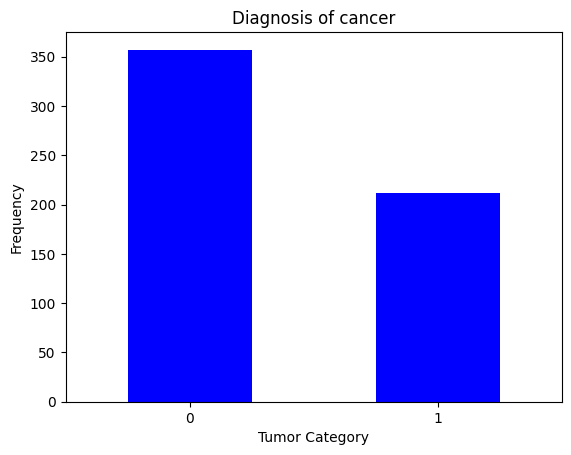

In [ ]:
# check the counts of the column 'diagnosis'
print(data['diagnosis'].value_counts())
data['diagnosis'].value_counts().plot(kind='bar',rot=0,color='b')
plt.title("Diagnosis of cancer")
plt.xlabel("Tumor Category")
plt.ylabel("Frequency")

In [ ]:
# separate the column 'diagnosis' into Malignant and Benign
Benign=data[data['diagnosis']==0]
Malignant=data[data['diagnosis']==1]
print("diagnosis_0",Benign.shape)
print("diagnosis_1",Malignant.shape)

diagnosis_0 (357, 20)
diagnosis_1 (212, 20)


1    357
0    357
Name: diagnosis, dtype: int64


<Axes: >

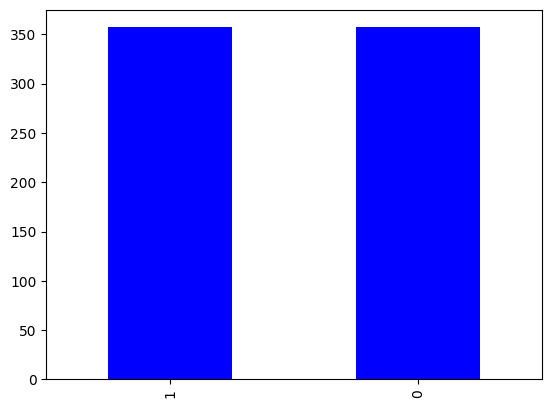

In [ ]:
# convert the imbalanced data into balanced by the technique over sampling
# using under sampling cause loss of data, so here used over sampling which add duplicate rows to the minority data group
Malignant_1= Malignant.sample(357, replace=True)
data_1= pd.concat([Malignant_1, Benign], axis=0)
print(data_1['diagnosis'].value_counts())
data_1['diagnosis'].value_counts().plot(kind='bar',color='b')

In [ ]:
# shape of the data after
data_1.shape

(714, 20)

In [ ]:
data_1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,area_se,compactness_se,concavity_se,concave points_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
393,1,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.2162,80.99,0.037260,0.04718,0.01288,2081.0,0.15020,0.57170,0.7053,0.24220,0.3828,0.10070
400,1,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.2113,41.51,0.037180,0.06165,0.01051,1304.0,0.18730,0.59170,0.9034,0.19640,0.3245,0.11980
353,1,15.08,25.74,98.00,716.6,0.10240,0.09769,0.12350,0.1647,63.37,0.024310,0.04912,0.01746,1050.0,0.16600,0.23560,0.4029,0.15260,0.2654,0.09438
446,1,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.1713,43.95,0.020150,0.03697,0.01110,1437.0,0.14010,0.37620,0.6399,0.19700,0.2972,0.09075
302,1,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.2249,130.80,0.047320,0.07649,0.01936,1696.0,0.13470,0.33910,0.4932,0.19230,0.3294,0.09469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.1454,19.54,0.046390,0.06578,0.01606,733.5,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004
559,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.1388,16.97,0.029820,0.05738,0.01267,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.1537,29.84,0.026780,0.02071,0.01626,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.1060,22.81,0.008878,0.00000,0.00000,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905


In [ ]:
# to reset index after over sampling
data_1.reset_index(drop=True,inplace=True)
data_1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,area_se,compactness_se,concavity_se,concave points_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.2162,80.99,0.037260,0.04718,0.01288,2081.0,0.15020,0.57170,0.7053,0.24220,0.3828,0.10070
1,1,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.2113,41.51,0.037180,0.06165,0.01051,1304.0,0.18730,0.59170,0.9034,0.19640,0.3245,0.11980
2,1,15.08,25.74,98.00,716.6,0.10240,0.09769,0.12350,0.1647,63.37,0.024310,0.04912,0.01746,1050.0,0.16600,0.23560,0.4029,0.15260,0.2654,0.09438
3,1,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.1713,43.95,0.020150,0.03697,0.01110,1437.0,0.14010,0.37620,0.6399,0.19700,0.2972,0.09075
4,1,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.2249,130.80,0.047320,0.07649,0.01936,1696.0,0.13470,0.33910,0.4932,0.19230,0.3294,0.09469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.1454,19.54,0.046390,0.06578,0.01606,733.5,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004
710,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.1388,16.97,0.029820,0.05738,0.01267,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
711,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.1537,29.84,0.026780,0.02071,0.01626,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
712,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.1060,22.81,0.008878,0.00000,0.00000,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905


In [ ]:
# collect columns
data_1.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'area_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

SEPARATING X AS INPUT AND Y AS OUTPUT

In [ ]:
# separate x as input
x=data_1.drop(['diagnosis'],axis=1)
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,area_se,compactness_se,concavity_se,concave points_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.2162,80.99,0.037260,0.04718,0.01288,2081.0,0.15020,0.57170,0.7053,0.24220,0.3828,0.10070
1,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.2113,41.51,0.037180,0.06165,0.01051,1304.0,0.18730,0.59170,0.9034,0.19640,0.3245,0.11980
2,15.08,25.74,98.00,716.6,0.10240,0.09769,0.12350,0.1647,63.37,0.024310,0.04912,0.01746,1050.0,0.16600,0.23560,0.4029,0.15260,0.2654,0.09438
3,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.1713,43.95,0.020150,0.03697,0.01110,1437.0,0.14010,0.37620,0.6399,0.19700,0.2972,0.09075
4,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.2249,130.80,0.047320,0.07649,0.01936,1696.0,0.13470,0.33910,0.4932,0.19230,0.3294,0.09469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.1454,19.54,0.046390,0.06578,0.01606,733.5,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004
710,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.1388,16.97,0.029820,0.05738,0.01267,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
711,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.1537,29.84,0.026780,0.02071,0.01626,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
712,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.1060,22.81,0.008878,0.00000,0.00000,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905


In [ ]:
# separate y as output
y=data_1['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
709    0
710    0
711    0
712    0
713    0
Name: diagnosis, Length: 714, dtype: int64

SPLITTING DATA INTO TRAIN SET AND TEST SET

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
print(x_train.shape)
x_train

(499, 19)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,area_se,compactness_se,concavity_se,concave points_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
28,17.46,39.28,113.40,920.6,0.09812,0.12980,0.14170,0.1809,49.00,0.027850,0.026020,0.013740,1408.0,0.1365,0.37350,0.3241,0.20660,0.2853,0.08496
43,17.29,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.2108,90.94,0.059810,0.046380,0.021490,1295.0,0.1134,0.28670,0.2298,0.15280,0.3067,0.07484
42,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.1765,111.70,0.036110,0.054890,0.027650,1656.0,0.1178,0.29200,0.3861,0.19200,0.2909,0.05865
73,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.1720,35.77,0.015600,0.029750,0.009753,1292.0,0.1263,0.26660,0.4290,0.15350,0.2842,0.08225
167,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.1879,26.85,0.028950,0.033210,0.014240,826.4,0.1431,0.30260,0.3194,0.15650,0.2718,0.09353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,17.27,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.1467,58.38,0.043080,0.049420,0.017420,1284.0,0.1436,0.41220,0.5036,0.17390,0.2500,0.07944
106,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.1907,71.56,0.039940,0.055540,0.016950,1567.0,0.1679,0.50900,0.7345,0.23780,0.3799,0.09185
270,16.13,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.1998,35.03,0.028680,0.026640,0.009067,1261.0,0.1446,0.58040,0.5274,0.18640,0.4270,0.12330
435,14.97,19.76,95.50,690.2,0.08421,0.05352,0.01947,0.1515,16.64,0.007983,0.008268,0.006432,782.1,0.1045,0.09995,0.0775,0.05754,0.2646,0.06085


In [ ]:
print(x_test.shape)
x_test

(215, 19)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,area_se,compactness_se,concavity_se,concave points_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
120,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.1801,97.85,0.025440,0.02822,0.016230,2403.0,0.1228,0.35830,0.3948,0.23460,0.3589,0.09187
329,18.45,21.91,120.20,1075.0,0.09430,0.09709,0.11530,0.1692,68.35,0.014220,0.02855,0.009148,1590.0,0.1465,0.22750,0.3965,0.13790,0.3109,0.07610
39,16.25,19.51,109.80,815.8,0.10260,0.18930,0.22360,0.2151,33.12,0.054700,0.08079,0.022150,939.7,0.1377,0.44620,0.5897,0.17750,0.3318,0.09136
294,21.09,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.2395,81.46,0.047590,0.03872,0.015670,2089.0,0.1491,0.75840,0.6780,0.29030,0.4098,0.12840
654,11.68,16.17,75.49,420.5,0.11280,0.09263,0.04279,0.1853,27.57,0.012920,0.01851,0.011670,549.8,0.1526,0.14770,0.1490,0.09815,0.2804,0.08024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,12.98,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.1761,20.65,0.032550,0.04393,0.009811,634.3,0.1288,0.32530,0.3439,0.09858,0.3596,0.09166
393,12.18,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.1739,14.68,0.006098,0.01069,0.006797,547.8,0.1123,0.08862,0.1145,0.07431,0.2694,0.06878
382,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.1942,12.96,0.035750,0.03980,0.013830,614.9,0.1536,0.47910,0.4858,0.17080,0.3527,0.10160
223,20.47,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.2166,100.40,0.030890,0.04093,0.016990,1645.0,0.1097,0.25340,0.3092,0.16130,0.3220,0.06386


In [ ]:
print(y_train.shape)
y_train

(499,)


28     1
43     1
42     1
73     1
167    1
      ..
71     1
106    1
270    1
435    0
102    1
Name: diagnosis, Length: 499, dtype: int64

In [ ]:
print(y_test.shape)
y_test

(215,)


120    1
329    1
39     1
294    1
654    0
      ..
534    0
393    0
382    0
223    1
140    1
Name: diagnosis, Length: 215, dtype: int64

NORMALIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

MODEL CREATION

K Nearest Neighbors Model and its Performance Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
clf=KNeighborsClassifier()
pmtr={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}
gd=GridSearchCV(clf,pmtr,cv=10,scoring='accuracy')  # CV = CrossValidation
gd.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(gd.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


[[ 94   4]
 [  5 112]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        98
           1       0.97      0.96      0.96       117

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



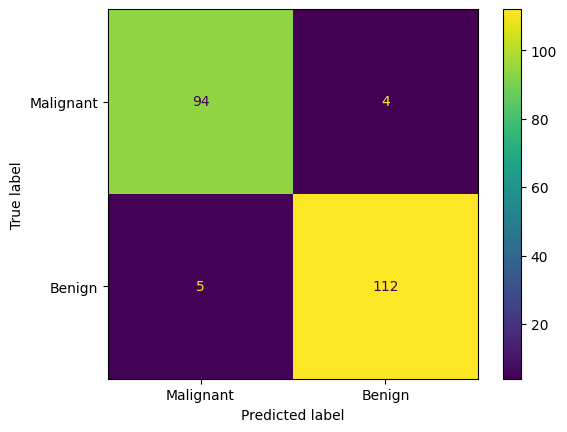

In [ ]:
k_model=KNeighborsClassifier(n_neighbors=3,weights='distance')
k_model.fit(x_train,y_train)
y_pred1=k_model.predict(x_test)
mat=confusion_matrix(y_test,y_pred1)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['Malignant','Benign'])
dis.plot()
print(classification_report(y_test,y_pred1))

Decision Tree Model and its Performance Evaluation

[[ 91   7]
 [  3 114]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        98
           1       0.94      0.97      0.96       117

    accuracy                           0.95       215
   macro avg       0.96      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215



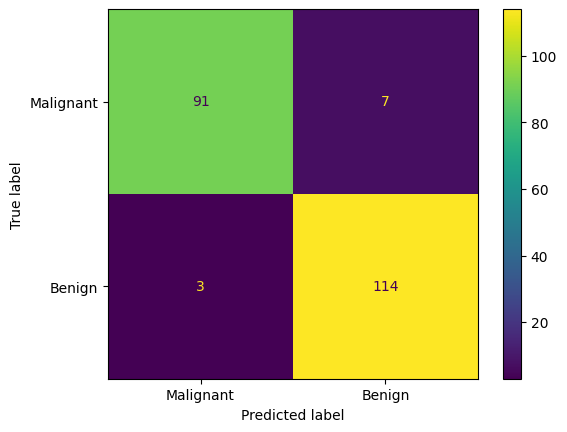

In [ ]:
from sklearn.tree import DecisionTreeClassifier
t_model=DecisionTreeClassifier()
t_model.fit(x_train,y_train)
y_pred2=t_model.predict(x_test)
mat=confusion_matrix(y_test,y_pred2)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['Malignant','Benign'])
dis.plot()
print(classification_report(y_test,y_pred2))

[Text(0.65625, 0.9285714285714286, 'concave points_worst <= 0.272\ngini = 0.499\nsamples = 499\nvalue = [259, 240]'),
 Text(0.4375, 0.7857142857142857, 'area_mean <= -0.067\ngini = 0.214\nsamples = 288\nvalue = [253, 35]'),
 Text(0.3125, 0.6428571428571429, 'area_worst <= -0.129\ngini = 0.068\nsamples = 256\nvalue = [247, 9]'),
 Text(0.25, 0.5, 'concave points_worst <= -0.024\ngini = 0.054\nsamples = 254\nvalue = [247, 7]'),
 Text(0.125, 0.35714285714285715, 'texture_mean <= 0.623\ngini = 0.017\nsamples = 237\nvalue = [235, 2]'),
 Text(0.0625, 0.21428571428571427, 'gini = 0.0\nsamples = 206\nvalue = [206, 0]'),
 Text(0.1875, 0.21428571428571427, 'texture_mean <= 0.634\ngini = 0.121\nsamples = 31\nvalue = [29, 2]'),
 Text(0.125, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.375, 0.35714285714285715, 'compactness_worst <= -0.414\ngini = 0.415\nsamples = 17\nvalue = [12, 5]'),
 Text(0

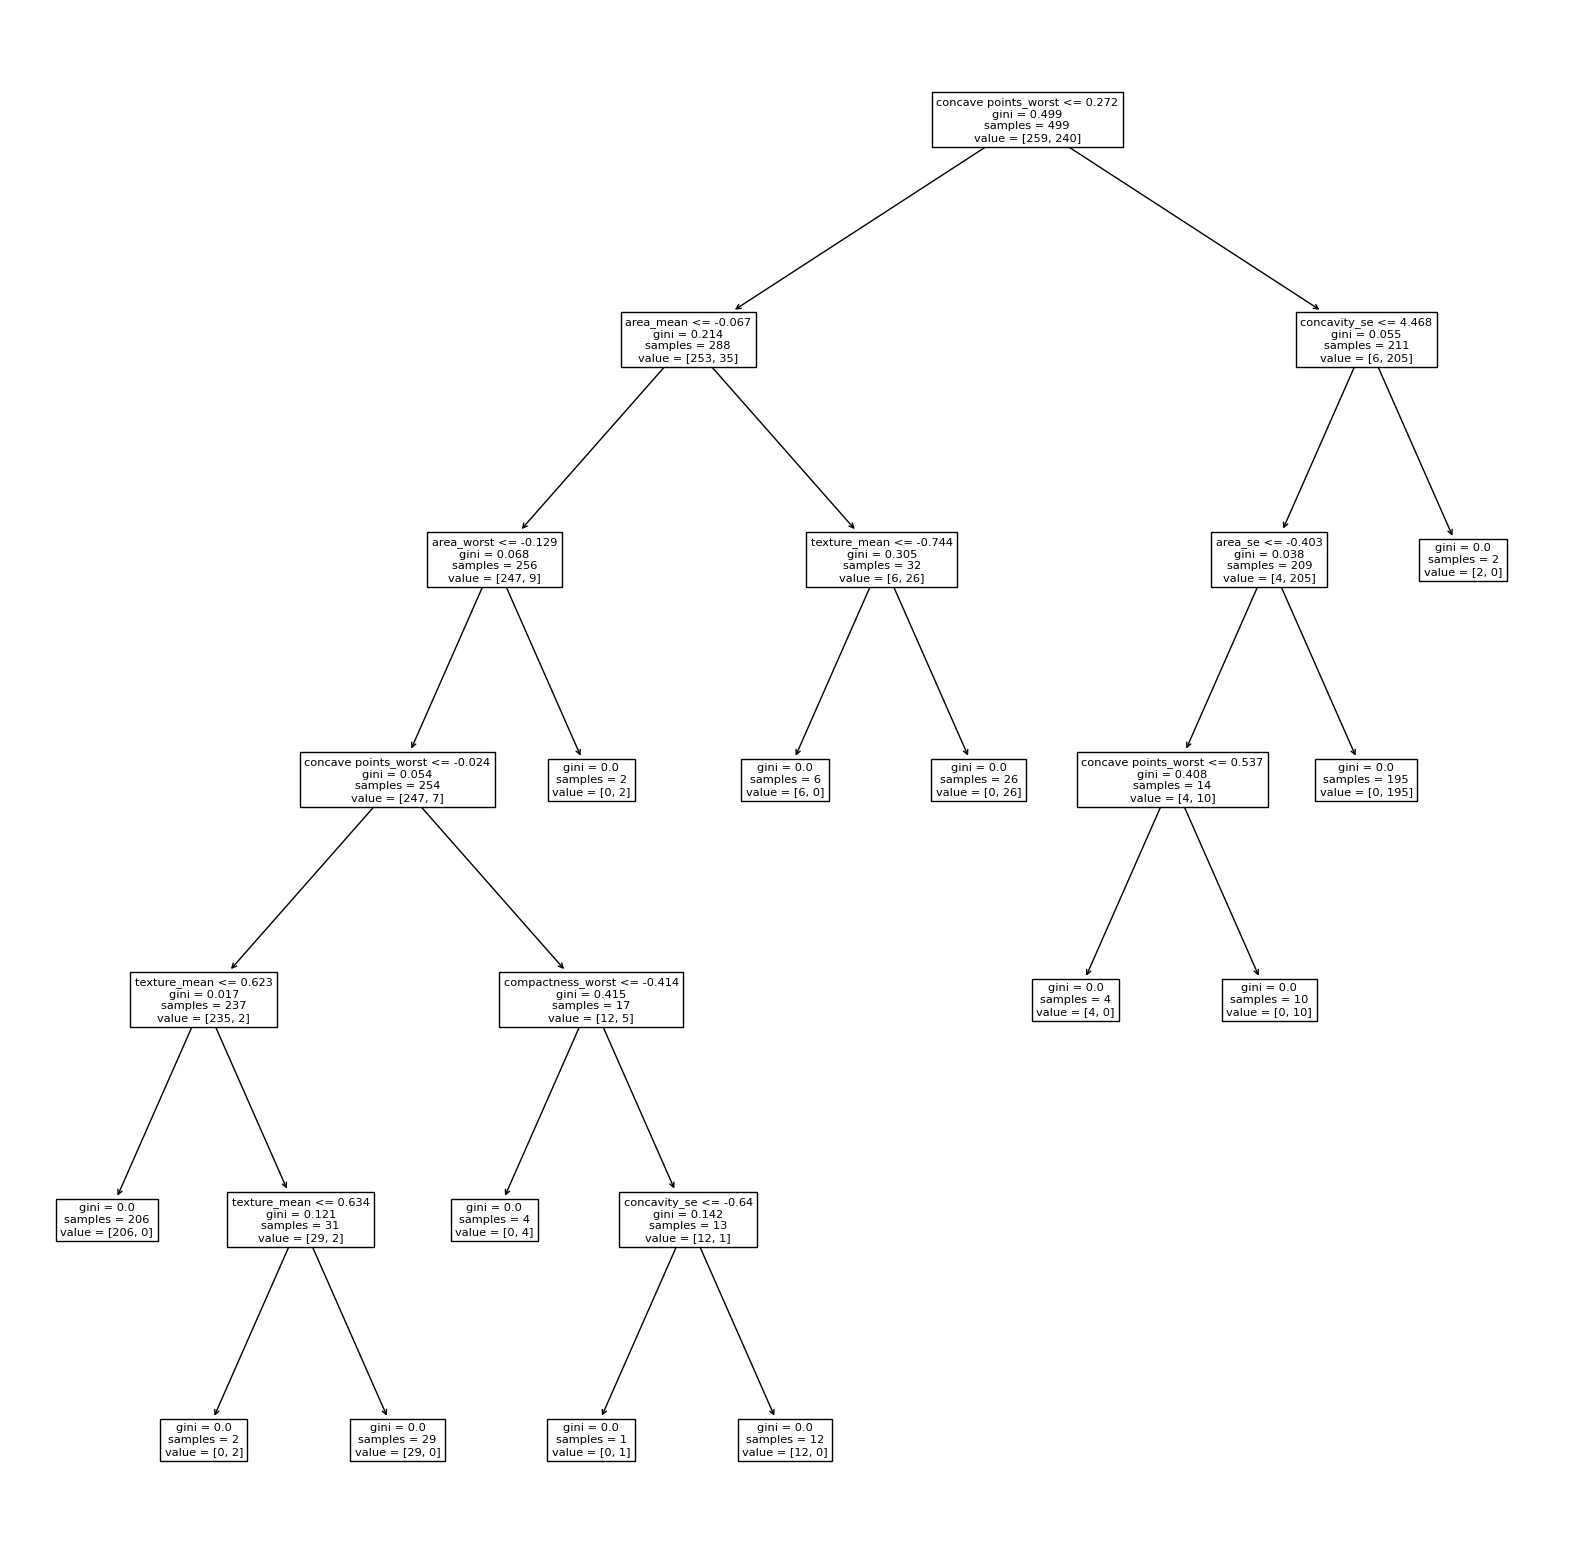

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(t_model,feature_names=['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','symmetry_mean', 'area_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst'])

Random Forest Model and its Performance Evaluation

[[ 91   7]
 [  3 114]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        98
           1       0.94      0.97      0.96       117

    accuracy                           0.95       215
   macro avg       0.96      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215



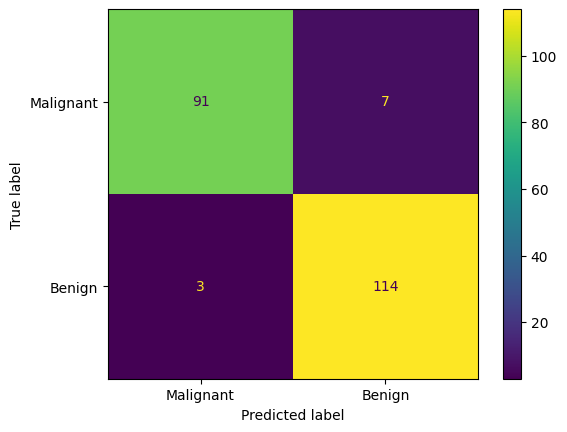

In [ ]:
from sklearn.ensemble import RandomForestClassifier
r_model=RandomForestClassifier()
r_model.fit(x_train,y_train)
y_pred3=t_model.predict(x_test)
mat=confusion_matrix(y_test,y_pred3)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['Malignant','Benign'])
dis.plot()
print(classification_report(y_test,y_pred3))